# Inaugural Project

Here we imports all necessary tools, set magics and create the model variable

In [1]:
# Setup modules autoreload
%load_ext autoreload
%autoreload 2

# Import class from py file
from Household_Specialization_Model_EFS import HSMC

# Import numpy
import numpy as np

# Import matplotlib + predefinite options for plots
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# Create model variable
model = HSMC()


# Question 1

We modified the HSMC class in HSM.py so that now it has a new function called "tableHFHM" that takes as positional attributes two vectors of values  of $\sigma$ and $\alpha$ and plots a table with values of $H_F/H_M$, implied by the level of HM and HF that maximise the utility for the household, for every combination of the given values of $\sigma$ and $\alpha$.
One major addition to the class module is the definition of the total value of home product consumption so that it is now able to take different functional forms depending on the value of $\sigma$.

In [2]:
# Vectors of values of alpha and sigma 
alpha_val=[0.25, 0.50, 0.75]
sigma_val=[0.50, 1.00, 1.50]

# Table: HF relative to HM, wrt alpha and sigma
model.tableHFHM(alpha_val,sigma_val)



a|s    0.50  1.00  1.50  
0.25  0.545 0.308 0.214
0.50  1.000 1.000 1.000
0.75  1.833 3.250 4.667


Above we can seen the changes in $H_F/H_M$ for different combinations of $\sigma$ and $\alpha$. Where $\alpha$ is the productivity of homeproduction of the female in the household (male´s productivity is therefore 1-$\alpha$). $\sigma$ is the elasticity of substitution. So an increase in elasticity would lead an increases in substitution from the less productive labour to the more productive one. The table confirms this dynamics: for sigma = 0 complete rigidity would lead to no substitution effect even when factors are not equally productive. When productivity of females in home production is 0.5, an increase or decrease in sigma has no effect on the relative amount of hours between males and females since there's no incentive to substitute between two equally productive factors; when is over 0.5, then changes in sigma would lead to higher and higher substitutions towards female home labour than males; the exact opposite, when under 0.5. 

# Question 2:

In this section we are going to plot the log value of home working hours between of females relative to males. We assume that working hours can only take discrete values with units of half an hour.

For sigma =  1.000, alpha =  0.500:
For wF =  0.800 -> optimal HM =  4.000; optimal HF =  5.000 -> HF/HM =  1.250, log HF/HM =  0.223
For wF =  0.900 -> optimal HM =  4.500; optimal HF =  4.500 -> HF/HM =  1.000, log HF/HM =  0.000
For wF =  1.000 -> optimal HM =  4.500; optimal HF =  4.500 -> HF/HM =  1.000, log HF/HM =  0.000
For wF =  1.100 -> optimal HM =  4.500; optimal HF =  4.000 -> HF/HM =  0.889, log HF/HM = -0.118
For wF =  1.200 -> optimal HM =  5.000; optimal HF =  4.000 -> HF/HM =  0.800, log HF/HM = -0.223


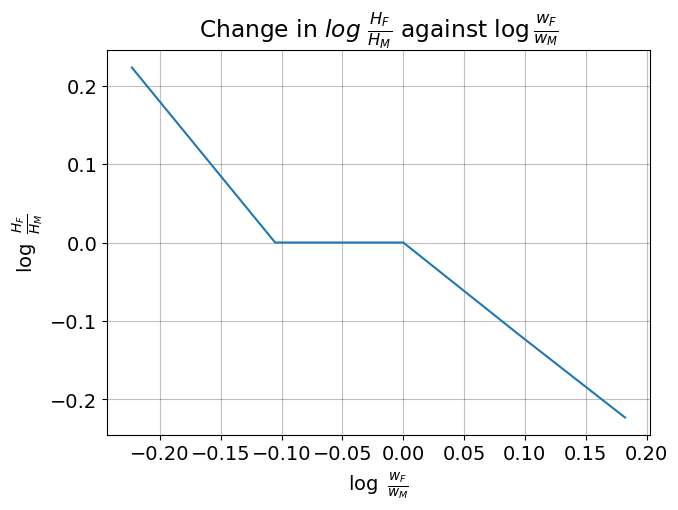

In [3]:
# Inserting the orginal values of alpha and sigma
model.par.sigma = 1
model.par.alpha = 0.5

# Calling the model for discrete setting
X, Y = model.solve_wF_vec(discrete=True)

# Plotting the figure 
plt.figure(figsize=(7,5))

plt.plot(X, Y)
plt.title('Change in '+r'$log\ \frac{H_F}{H_M}$' + ' against ' + r'$\log \frac{w_F}{w_M}$')
plt.xlabel(r'$\log\ \frac{w_F}{w_M}$')
plt.ylabel(r'$\log\ \frac{H_F}{H_M}$')
plt.show()

In the figure above we see the relation between the females wage relative to the males wage plottet against the hours worked at home of the female against the hours worked at home of the male. Futhermore, $\alpha$ is set to 0.5 the female and male is therefore equal productive in home production. $\sigma$ is set to 1 and thereby are the work fully substitutable.
It is seen when the females wage is between 0.9-1.0 then they work an equal amount in home production.

# Question 3

In this section we are going to plot the log value of home working hours between of females relative to males, as we did in question 2. This time we make no restrictive assumption about working hours possible values, which now can take any value in the continuum between 0 and 24.

For sigma =  1.000, alpha =  0.500:
For wF =  0.800 -> optimal HM =  4.054; optimal HF =  5.085 -> HF/HM =  1.254, log HF/HM =  0.227
For wF =  0.900 -> optimal HM =  4.500; optimal HF =  4.500 -> HF/HM =  1.000, log HF/HM =  0.000
For wF =  1.000 -> optimal HM =  4.500; optimal HF =  4.500 -> HF/HM =  1.000, log HF/HM =  0.000
For wF =  1.100 -> optimal HM =  4.393; optimal HF =  4.392 -> HF/HM =  1.000, log HF/HM = -0.000
For wF =  1.200 -> optimal HM =  4.572; optimal HF =  4.193 -> HF/HM =  0.917, log HF/HM = -0.086


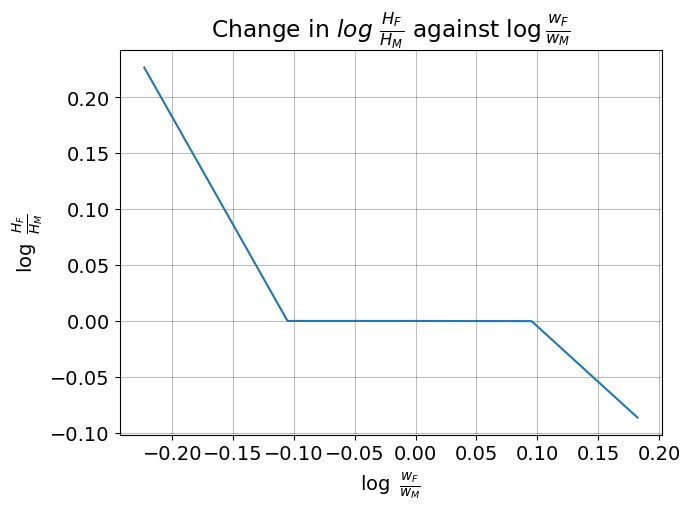

In [4]:
# Inserting the orginal values of alpha and sigma
model.par.sigma = 1.0
model.par.alpha = 0.5

# Calling the function for continuous setting
X, Y = model.solve_wF_vec(discrete=False)

# Plotting the figure
plt.figure(figsize=(7,5))

plt.plot(X, Y)
plt.title('Change in '+r'$log\ \frac{H_F}{H_M}$' + ' against ' + r'$\log \frac{w_F}{w_M}$')
plt.xlabel(r'$\log\ \frac{w_F}{w_M}$')
plt.ylabel(r'$\log\ \frac{H_F}{H_M}$')
plt.show()

The results coming from the application of a solver allowing for continuous values of the working hours variables, comply with the results found in the discrete setting: the optimal values are similar (beside some probable rounding tricks which make logHF/HM different for wF = 1.1) and that should be an expected result since no change in the model functions and parameters has been made. 

Question 2 and 3 represent the dynamics of working hours in home production for the household as a result of a change in the wage rate for females:
- when the wage rate of females is significantly lower than males, the working hours in home production of females is higher than males;
- when the wage rate of females is significantly higher than males, the working hours in home production of females is lower than males;
- when wage rate is similar between sexes, home working hours  will be similar.

We can interpret the change in wF rate as a percentage value respect to male wages since wM is = 1.

**To sum up:**
In both graphs we can see how a percentage change in the realtive value of the female wage rate on the market respect to mans, will bring a percentage reduction of the relative value of home working hours of females relative to mans. At equal levels of wage correspond equal levels of home working hours.

**Plus:**
The negative relation remains also when changing different values of female home productivity, $\alpha$, and elasticity of substitution, $\sigma$. Moreover:
- an increase in female home productivity, $\alpha$, will increase females home working hours, ceteris paribus, and viceversa;
- an increase in elasticity of substitution, $\sigma$, will make the effects of a change in alpha or the wage rate more dramatic. A decrease of sigma, leads to rigidity and therefore to less drastic effects of the change in other parameters: it takes bigger changes to the other parameters to have the same effects as with a higher sigma value.

# Question 4

We search for the optimal values for alpha and sigma in order to minimize the deviation from the real values of the regression parameters. We use an ad hoc class function called "estimation".

In [5]:
model.estimate()


alpha =  0.9882541917533743
sigma =  0.09081041829875786
The minimum value obtained is 2.7929981209952493e-09


The minimizatation returned a satisfying result: 
2.7929981209952493e-09 is a imaginary number close to 0.

The results drawn from the optimization are one way in which the model can explain the empirical findings, since with those values of alpha and sigma, the parameters estimated by running a regression on the equilibrium values derived from the model, are practically identical to the ones estimated on empirical data, which are provided.

In this perspective, the empirical findings can be seen to suggest the correctness of assuming an high value of $\alpha$, so that productivity in home production is much higher for females than for mans. Futhermore, the elasticity, $\sigma$, to be almost zero, hinting at a really low willingness to substitute between female and male home production.

This could be a painfully realistic depiction of beliefs and behaviour in many societies in the modern world. 

Anyhow, this result isn't necessary representative of reality: e.g. the model could be wrongfully designed. Modification to the theorical model may lead to the estimatation of different values of alpha and sigma, to comply with the empirical results. 
We go deeper on that in question 5.


# Question 5

We modified our estimation function so to fix the value of alpha on a desired level and therefore minimize the deviation from the true regression parameters only with regard to sigma. This allow us to embed the empirical findings suggesting a credible value of home productivity for females and males is 0.5, and is what changes in our optimal values. 

In [6]:
#Choose value of alpha
alph = (0.5)
model.modification(alph)

sigma =  [0.12216797]
The minimum value obtained is 0.1602830894570259


This result states that an increase in sigma's value could be a consistent explanation for the correct estimation of the empirical parameters, while also allowing to test the feasibility of the assumption of $\alpha$ being = 0.5

In order to allow for a lower value of home productivity for females, we must be willing to consider the possibility for less rigidity in the substitution between the female and male home labour:
a feasible solution.

Anyhow we can see that the assumption of such values of alpha and sigma, won't completly minimize the deviation from the true empirical regression parameters, at least not as before.

We tried modifying the values of the other fixed parameters in the model: low values of rho, $\rho$, resulted in better optimization in the case where both alpha and sigma are endogenous. Anyhow did not provide better optimization when alpha is fixed. 

To provide just an intuition, another step in the modification of the original model, could taking into account the existence of e.g a cultural effect, which counterbalances the lower level of female home productivity, and therefore keeps the levels of female home working hours high also in situations of higher elasticity of substitution and productivity.